Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 3 modules with codelength: 4.311792645801829
Writing network figure to output/karate.png


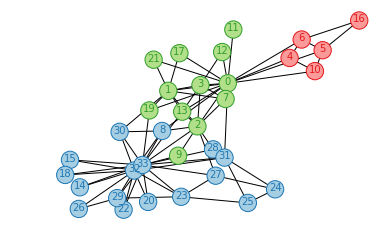

In [4]:

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pathlib

import infomap

"""
Generate and draw a network with NetworkX, colored
according to the community structure found by Infomap.
"""


def find_communities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id.
    """

    im = infomap.Infomap("--two-level")

    print("Building Infomap network from a NetworkX graph...")
    for source, target in G.edges:
        im.add_link(source, target)

    print("Find communities with Infomap...")
    im.run()

    print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")

    communities = im.get_modules()
    nx.set_node_attributes(G, communities, 'community')


def draw_network(G):
    # position map
    pos = nx.spring_layout(G)
    # community index
    communities = [c - 1 for c in nx.get_node_attributes(G, 'community').values()]
    num_communities = max(communities) + 1

    # color map from http://colorbrewer2.org/
    cmap_light = colors.ListedColormap(
        ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', num_communities)
    cmap_dark = colors.ListedColormap(
        ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', num_communities)

    # edges
    nx.draw_networkx_edges(G, pos)

    # nodes
    node_collection = nx.draw_networkx_nodes(
        G, pos=pos, node_color=communities, cmap=cmap_light)

    # set node border color to the darker shade
    dark_colors = [cmap_dark(v) for v in communities]
    node_collection.set_edgecolor(dark_colors)

    # Print node labels separately instead
    for n in G.nodes:
        plt.annotate(n,
                     xy=pos[n],
                     textcoords='offset points',
                     horizontalalignment='center',
                     verticalalignment='center',
                     xytext=[0, 2],
                     color=cmap_dark(communities[n]))

    plt.axis('off')
    pathlib.Path("output").mkdir(exist_ok=True)
    print("Writing network figure to output/karate.png")
    plt.savefig("/Users/aporter1350/Desktop/karate.png")
    # plt.show()


G = nx.karate_club_graph()

find_communities(G)
draw_network(G)

